In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import random
import os
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
os.chdir('/content/drive/My Drive/DDD_Transfer_Learning/DDD_MobileNet/train_data')

In [ ]:
img_array = cv2.imread("closed_eyes/_0.jpg", cv2.IMREAD_GRAYSCALE)

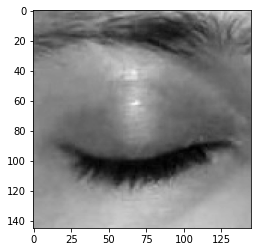

In [ ]:
plt.imshow(img_array, cmap ="gray")

In [ ]:
img_array.shape

(145, 145)

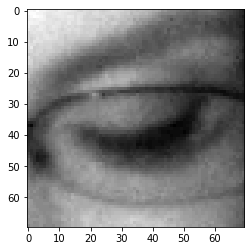

In [ ]:
#Datadirectory = "train_data"
Classes = ["closed_eyes", "open_eyes"]
for category in Classes:
    path  = os.path.join(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break

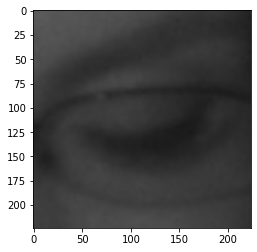

In [ ]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

#### Reading all the images and converting them into an array for data and labels

In [ ]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [11]:
create_training_data()

In [12]:
print(len(training_data))

2629


In [13]:
random.shuffle(training_data)

In [14]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [15]:
X.shape

(2629, 224, 224, 3)

In [16]:
y.shape

(2629,)

In [17]:
#normalize the data
X = X/255.0;

### Deep Learning model for training and learning

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 1s 0us/step


In [20]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

#### Transfer Learning

In [26]:
base_input = model.layers[0].input

In [27]:
base_output = model.layers[-4].output

In [28]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [29]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [30]:
new_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

#### Settings for Binary Classification (open/closed eyes)

In [31]:
new_model.compile(loss = "binary_crossentropy", optimizer ="adam", metrics = ["accuracy"])

In [32]:
history = new_model.fit(X, y, epochs = 5, batch_size = 64, validation_split = 0.1)

Epoch 1/5
37/37 [==============================] - 359s 10s/step - loss: 0.1159 - accuracy: 0.9670 - val_loss: 4.7077 - val_accuracy: 0.5323
Epoch 2/5
37/37 [==============================] - 357s 10s/step - loss: 0.0082 - accuracy: 0.9979 - val_loss: 0.1585 - val_accuracy: 0.9772
Epoch 3/5
37/37 [==============================] - 358s 10s/step - loss: 0.0040 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9924
Epoch 4/5
37/37 [==============================] - 359s 10s/step - loss: 0.0025 - accuracy: 0.9987 - val_loss: 0.0115 - val_accuracy: 0.9962
Epoch 5/5
37/37 [==============================] - 360s 10s/step - loss: 0.0039 - accuracy: 0.9983 - val_loss: 0.0012 - val_accuracy: 1.0000


In [33]:
new_model.save("my_model.h5")

In [34]:
new_model = tf.keras.models.load_model("my_model.h5")

#### Checking the network for predictions

In [35]:
img_array = cv2.imread('closed_eyes/_3.jpg',  cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [36]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [37]:
X_input.shape

(1, 224, 224, 3)

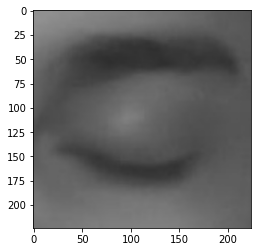

In [38]:
plt.imshow(new_array)

In [39]:
X_input = X_input/255.0

In [40]:
prediction = new_model.predict(X_input)

In [41]:
prediction

array([[2.0039918e-11]], dtype=float32)

In [42]:
#Lets check on unknown images

In [45]:
img = cv2.imread('/content/drive/My Drive/DDD_Transfer_Learning/DDD_MobileNet/sad_woman.jpg')

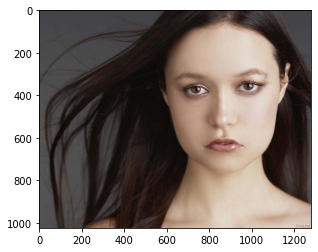

In [46]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [48]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [49]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [50]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [51]:
eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)

In [52]:
for(x, y, w ,h) in eyes:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

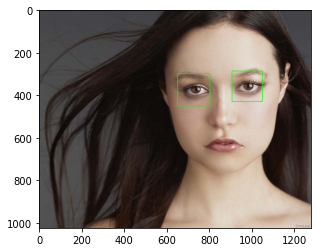

In [53]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [54]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)
for x,y,w,h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyes_new = eye_cascade.detectMultiScale(roi_gray)
  if len(eyes_new) == 0:
    print("Eyes are not detected")
  else:
    for (ex, ey, ew, eh) in  eyes_new:
      eyes_roi =  roi_color[ey: ey + eh, ex:ex + ew]

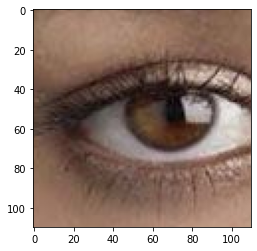

In [55]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [56]:
eyes_roi.shape

(110, 110, 3)

In [57]:
final_image = cv2.resize(eyes_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [58]:
final_image.shape

(1, 224, 224, 3)

In [59]:
new_model.predict(final_image)

array([[1.]], dtype=float32)

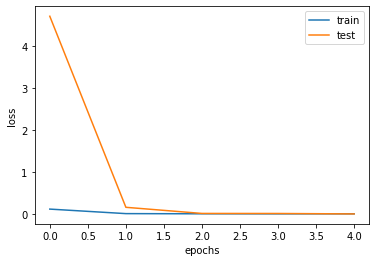

In [60]:
# plot loss and accuracy history 
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

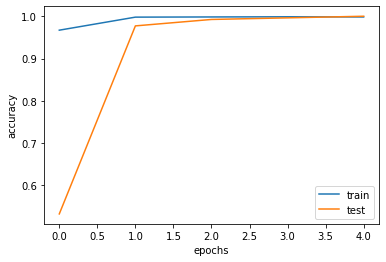

In [61]:
#plot history and accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()